<a href="https://colab.research.google.com/github/FatemehAbbasi166/Pathrise_Company_Project/blob/main/Data_pathrise_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset


In [2]:
from google.colab import files

In [3]:
uploaded= files.upload()

Saving Data_Pathrise.csv to Data_Pathrise.csv


# Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read the Data

In [5]:
df=pd.read_csv('Data_Pathrise.csv')

In [6]:
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [7]:
# Renaming columns to remove leading and trailing whitespaces
df.rename(columns=lambda x: x.strip(), inplace=True)

In [8]:
# Removing first column
df.drop(columns='id',  inplace= True) # df.drop('id', axis=1,inplace= True)

# Data Understanding

In [9]:
df.shape

(2544, 15)

In [10]:
df.columns

Index(['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              2544 non-null   object 
 1   primary_track                2544 non-null   object 
 2   cohort_tag                   2536 non-null   object 
 3   program_duration_days        1928 non-null   float64
 4   placed                       2544 non-null   int64  
 5   employment_status            2315 non-null   object 
 6   highest_level_of_education   2486 non-null   object 
 7   length_of_job_search         2470 non-null   object 
 8   biggest_challenge_in_search  2520 non-null   object 
 9   professional_experience      2322 non-null   object 
 10  work_authorization_status    2260 non-null   object 
 11  number_of_interviews         2326 non-null   float64
 12  number_of_applications       2544 non-null   int64  
 13  gender            

In [12]:
df.isnull().sum()

pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [13]:
df.isnull().sum().sum()

2243

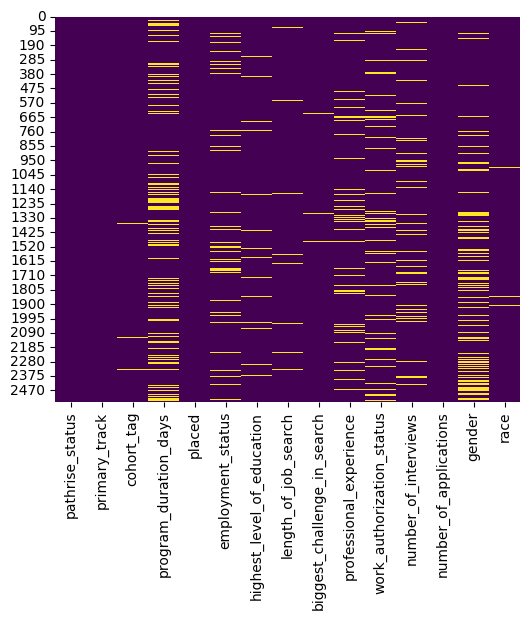

In [14]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [15]:
# Calculating the count of missing values for each column
missing_values = df.isna().sum().sort_values(ascending=False).to_frame()

In [16]:
# Styling the DataFrame directly
styled_df = df.isna().sum().sort_values(ascending=False).to_frame().style\
    .set_properties(**{"background-color": "purple", "color": "yellow", "border": "2px solid black"})

# Display the styled DataFrame
styled_df

,0
program_duration_days,616
gender,492
work_authorization_status,284
employment_status,229
professional_experience,222
number_of_interviews,218
length_of_job_search,74
highest_level_of_education,58
biggest_challenge_in_search,24
race,18


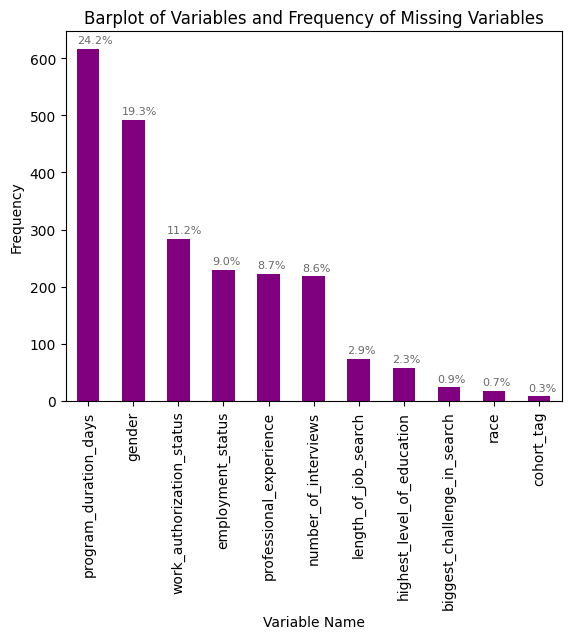

In [17]:
# Calculate and filter missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False) # Keep only the variables (columns) that have missing values in descending order.

# Create a bar plot
ax = missing.plot(kind='bar', alpha=1, color='purple')

# Set plot properties
ax.set_title("Barplot of Variables and Frequency of Missing Variables")
ax.set_ylabel("Frequency")
ax.set_xlabel('Variable Name')

# Add text labels above each bar in the bar plot.
for i in ax.patches:
    ax.text(i.get_x(), i.get_height() + 10,
            f"{round((i.get_height()/len(df))*100, 1)}%", fontsize=8, color='dimgrey')

plt.show()

In [18]:
len(df) # The total number of data points

2544

In [19]:
cols=['primary_track', 'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race']
dic_pivot={}
for col in cols:
    pivot_table1=pd.pivot_table(df[[col,'placed']],index='placed', columns=col, aggfunc='size')
    column_total=pivot_table1.sum()
    pivot_table2=pivot_table1.divide(column_total)*100
    pivot_table2.index=['Not placed %','Placed %']
    row_total=column_total.sum()
    population=column_total.divide(row_total)*100
    pivot_table2.loc['population %']=population
    dic_pivot[col]=pivot_table2
    ptivot_heat=pivot_table2.style.background_gradient(cmap ='viridis').format("{:.2f}")
    display(ptivot_heat)
    #ptivot_heat.to_excel(file_path+'{}_pivot.xlsx'.format(col))

primary_track,Data,Design,Marketing,PSO,SWE,Web
Not placed %,64.52,68.06,50.00,75.16,58.64,83.33
Placed %,35.48,31.94,50.00,24.84,41.36,16.67
population %,9.75,11.32,0.08,12.66,65.96,0.24


employment_status,Contractor,Employed Full-Time,Employed Part-Time,Student,Unemployed
Not placed %,68.24,63.68,60.74,63.10,61.95
Placed %,31.76,36.32,39.26,36.90,38.05
population %,7.34,18.79,11.66,33.48,28.73


highest_level_of_education,Bachelor's Degree,Doctorate or Professional Degree,GED or equivalent,High School Graduate,Master's Degree,"Some College, No Degree",Some High School
Not placed %,61.50,56.30,66.67,33.33,64.44,62.96,73.33
Placed %,38.50,43.70,33.33,66.67,35.56,37.04,26.67
population %,54.75,5.43,0.60,0.60,32.58,5.43,0.60


length_of_job_search,1-2 months,3-5 months,6 months to a year,Less than one month,Over a year
Not placed %,59.49,66.21,64.26,63.31,63.33
Placed %,40.51,33.79,35.74,36.69,36.67
population %,31.78,20.85,9.51,33.00,4.86


biggest_challenge_in_search,Behavioral interviewing,Figuring out which jobs to apply for,Getting past final round interviews,Getting past mid-stage interviews,Getting past phone screens,Hearing back on my applications,Lack of relevant experience,Resume gap,Technical interviewing,Technical skills
Not placed %,60.00,66.13,57.82,60.95,61.11,64.27,60.36,71.43,61.11,77.78
Placed %,40.00,33.87,42.18,39.05,38.89,35.73,39.64,28.57,38.89,22.22
population %,2.38,7.38,11.67,8.33,7.14,39.76,8.81,1.67,11.43,1.43


professional_experience,1-2 years,3-4 years,5+ years,Less than one year
Not placed %,62.93,59.32,59.47,61.17
Placed %,37.07,40.68,40.53,38.83
population %,37.98,24.03,11.37,26.61


work_authorization_status,Canada Citizen,Citizen,F1 Visa/CPT,F1 Visa/OPT,Green Card,H1B,Not Authorized,Other,STEM OPT
Not placed %,62.50,62.41,65.15,63.98,61.96,72.92,100.00,60.71,75.00
Placed %,37.50,37.59,34.85,36.02,38.04,27.08,nan,39.29,25.00
population %,1.06,48.85,5.84,28.50,8.14,2.12,0.18,4.96,0.35


gender,Decline to Self Identify,Female,Male,Non-Binary
Not placed %,81.25,64.68,58.98,83.33
Placed %,18.75,35.32,41.02,16.67
population %,0.78,26.22,72.71,0.29


race,"Black, Afro-Caribbean, or African American",Decline to Self Identify,East Asian or Asian American,Latino or Hispanic American,Middle Eastern or Arab American,Native American or Alaskan Native,Non-Hispanic White or Euro-American,South Asian or Indian American,Two or More Races
Not placed %,75.40,76.81,62.11,67.31,53.03,nan,61.78,57.54,68.75
Placed %,24.60,23.19,37.89,32.69,46.97,100.00,38.22,42.46,31.25
population %,4.99,2.73,35.63,6.18,2.61,0.12,22.68,21.26,3.80
